In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile,join
from time import sleep
def P2dB(P): return 10*np.log10(np.abs(P))

In [2]:
fpath='xst_mean'
files=listdir(fpath)#[f for f in listdir(fpath)];
files.sort()
files = [f for f in files if isfile(join(fpath,f))]
print(len(files))
print(files)

69
['xst_mean_2022-07-08-15.npz', 'xst_mean_2022-07-08-16.npz', 'xst_mean_2022-07-08-17.npz', 'xst_mean_2022-07-08-18.npz', 'xst_mean_2022-07-08-19.npz', 'xst_mean_2022-07-08-20.npz', 'xst_mean_2022-07-08-21.npz', 'xst_mean_2022-07-08-22.npz', 'xst_mean_2022-07-08-23.npz', 'xst_mean_2022-07-09-00.npz', 'xst_mean_2022-07-09-01.npz', 'xst_mean_2022-07-09-02.npz', 'xst_mean_2022-07-09-03.npz', 'xst_mean_2022-07-09-04.npz', 'xst_mean_2022-07-09-05.npz', 'xst_mean_2022-07-09-06.npz', 'xst_mean_2022-07-09-07.npz', 'xst_mean_2022-07-09-08.npz', 'xst_mean_2022-07-09-09.npz', 'xst_mean_2022-07-09-10.npz', 'xst_mean_2022-07-09-11.npz', 'xst_mean_2022-07-09-12.npz', 'xst_mean_2022-07-09-13.npz', 'xst_mean_2022-07-09-14.npz', 'xst_mean_2022-07-09-15.npz', 'xst_mean_2022-07-09-16.npz', 'xst_mean_2022-07-09-17.npz', 'xst_mean_2022-07-09-18.npz', 'xst_mean_2022-07-09-19.npz', 'xst_mean_2022-07-09-20.npz', 'xst_mean_2022-07-09-21.npz', 'xst_mean_2022-07-09-22.npz', 'xst_mean_2022-07-09-23.npz', 'xst_m

In [3]:
D=[]
Cnt=[]
dates=[]
for fn in files:
    D2=np.load(fpath+"/"+fn)
    D.append(D2['xst'])
    Cnt.append(D2['cnt'])
    dates.append(fn.split('.')[0][9:])
D=np.array(D)
Cnt=np.array(Cnt)
print(D.shape,Cnt.shape)
print(Cnt[:,10])

(69, 512, 18, 18) (69, 512)
[50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50]


In [4]:
print(dates)

['2022-07-08-15', '2022-07-08-16', '2022-07-08-17', '2022-07-08-18', '2022-07-08-19', '2022-07-08-20', '2022-07-08-21', '2022-07-08-22', '2022-07-08-23', '2022-07-09-00', '2022-07-09-01', '2022-07-09-02', '2022-07-09-03', '2022-07-09-04', '2022-07-09-05', '2022-07-09-06', '2022-07-09-07', '2022-07-09-08', '2022-07-09-09', '2022-07-09-10', '2022-07-09-11', '2022-07-09-12', '2022-07-09-13', '2022-07-09-14', '2022-07-09-15', '2022-07-09-16', '2022-07-09-17', '2022-07-09-18', '2022-07-09-19', '2022-07-09-20', '2022-07-09-21', '2022-07-09-22', '2022-07-09-23', '2022-07-10-00', '2022-07-10-02', '2022-07-10-03', '2022-07-10-04', '2022-07-10-05', '2022-07-10-06', '2022-07-10-07', '2022-07-10-08', '2022-07-10-09', '2022-07-10-10', '2022-07-10-11', '2022-07-10-12', '2022-07-10-13', '2022-07-10-14', '2022-07-10-15', '2022-07-10-16', '2022-07-10-17', '2022-07-10-18', '2022-07-10-19', '2022-07-10-20', '2022-07-10-21', '2022-07-10-22', '2022-07-10-23', '2022-07-11-00', '2022-07-11-01', '2022-07-11-0

/tmp/ipykernel_91717/3803430593.py:6: RuntimeWarning: divide by zero encountered in log10
  def P2dB(P): return 10*np.log10(np.abs(P))
/tmp/ipykernel_91717/3803430593.py:6: RuntimeWarning: divide by zero encountered in log10
  def P2dB(P): return 10*np.log10(np.abs(P))
/tmp/ipykernel_91717/3803430593.py:6: RuntimeWarning: divide by zero encountered in log10
  def P2dB(P): return 10*np.log10(np.abs(P))
/tmp/ipykernel_91717/507189845.py:14: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(dates[:],100/mask,'k.')


[39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68]


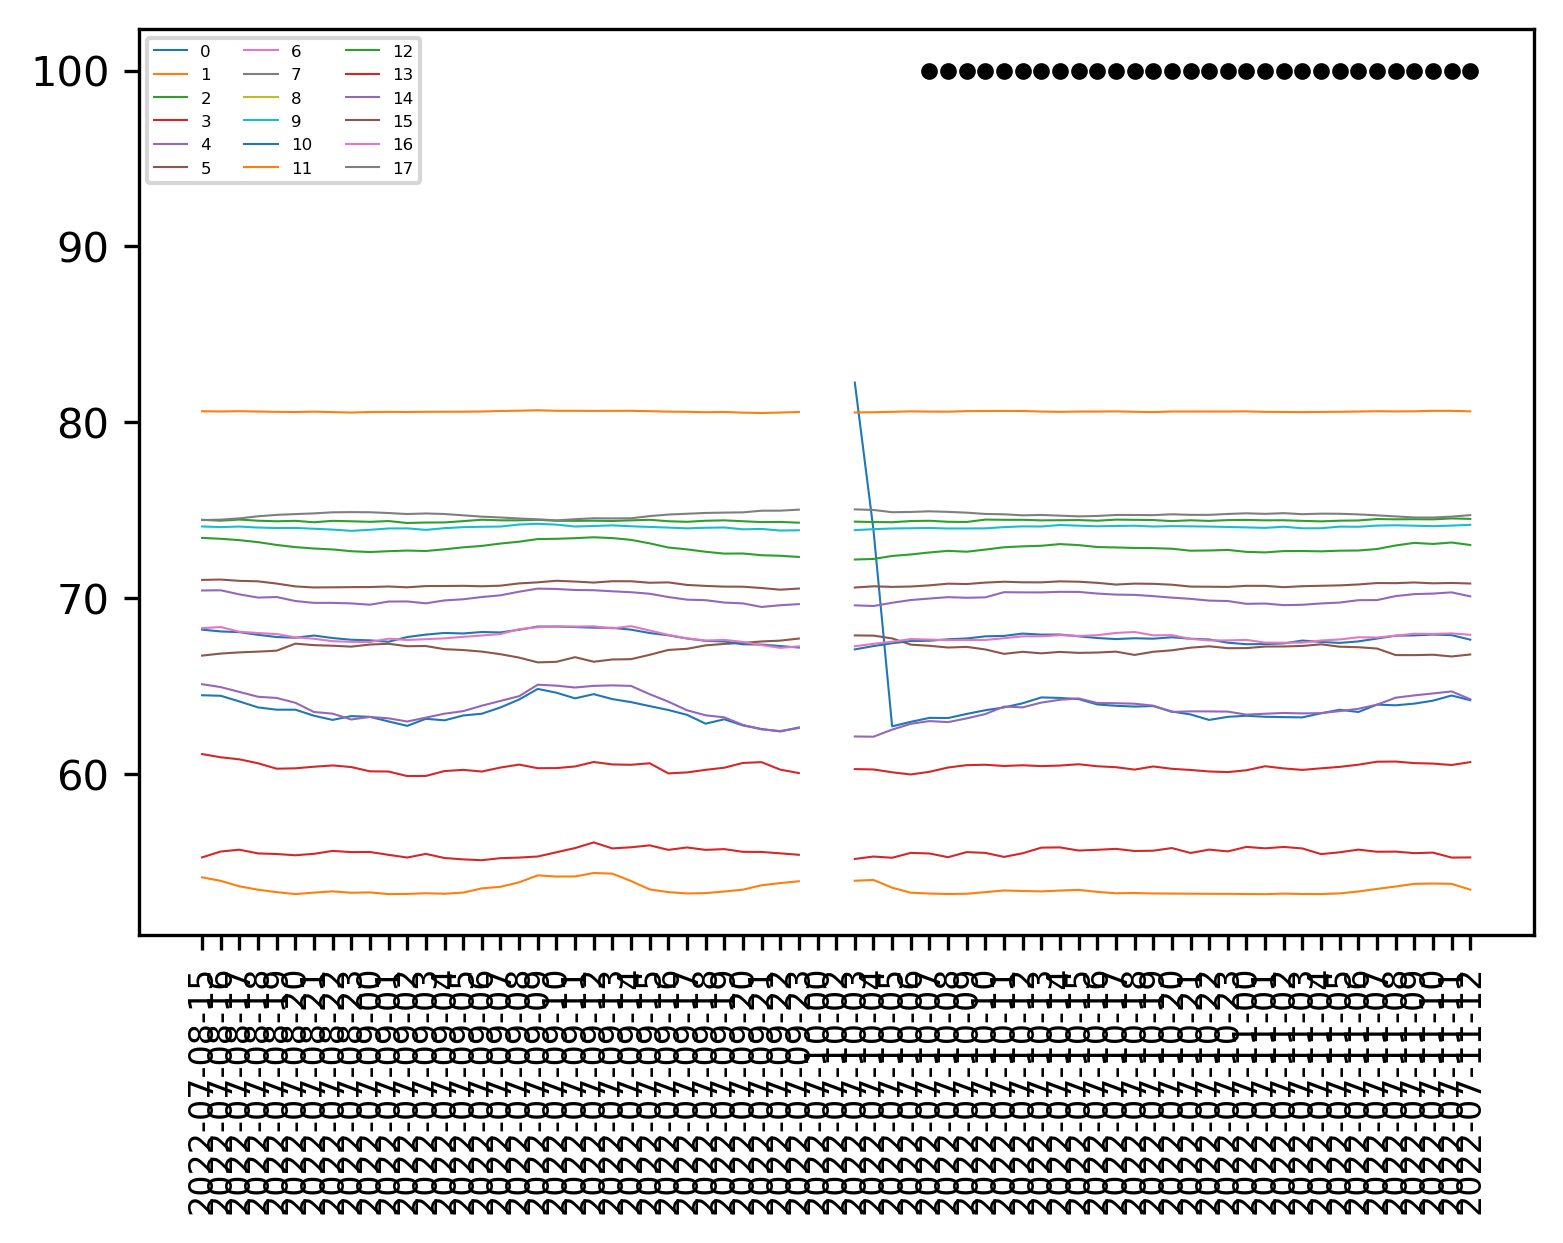

In [8]:
plt.figure(dpi=300)
x1=0
x2=-1
#x1=19
#x2=21
for i in range(18):
    plt.plot(dates[:],P2dB(np.sum(D[:,7:,i,i]*Cnt[:,7:],axis=1)/np.sum(Cnt[:,7:],axis=1)),'-',label='%i'%i,linewidth=0.5)
#mask=P2dB(np.sum(D[:,:,0,0],axis=1))
mask=P2dB(np.sum(D[:,7:,i,i]*Cnt[:,7:],axis=1)/np.sum(Cnt[:,7:],axis=1))
#mask=np.array([np.isreal(x)*(x>90)*(x<92)*1 for x in mask])
mask=np.array([np.isreal(x)*1 for x in mask])
#mask[-3]=0
mask[:-30]=0
plt.plot(dates[:],100/mask,'k.')
tms=np.arange(len(mask),dtype=int).compress(mask)
print(tms)
plt.legend(ncol=3,fontsize=4)
locs, labels = plt.xticks()
plt.xticks(locs[::],rotation=90,fontsize=8);

In [9]:
D2=np.sum(D[tms,:]*Cnt[tms,:,np.newaxis,np.newaxis],axis=0)/np.sum(Cnt[tms,:],axis=0)[:,np.newaxis,np.newaxis]

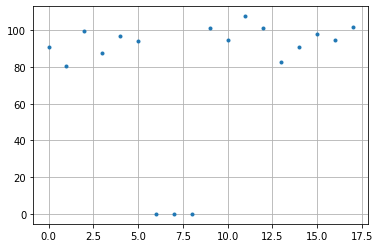

In [10]:
pwr=[P2dB(np.sum(D2[:,i,i])+1) for i in range(18)]
plt.plot(pwr,'.')
plt.grid()

In [24]:
sis=np.array(range(len(pwr)))
sis=sis.compress((np.array(pwr)>10)*(np.array(pwr)<120))
sis=[0,1,2,3,4,5]
print(sis)

[0, 1, 2, 3, 4, 5]


In [25]:
#sis=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
pairs=[[x,y] for i,x in enumerate(sis) for y in sis[i+1:]]
#pairs=[[x,y] for i,x in enumerate(sis) for y in sis[i+1:i+2]]
print(pairs)


[[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [1, 2], [1, 3], [1, 4], [1, 5], [2, 3], [2, 4], [2, 5], [3, 4], [3, 5], [4, 5]]


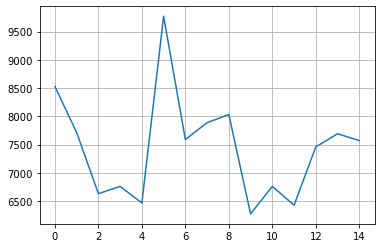

In [26]:
PPwr=[np.sum(P2dB(np.roll(D2[:,p[1],p[0]],-7)+1e-6)[1:]) for p in pairs]
plt.plot(PPwr)
Pcut=12000
plt.grid()
#plt.ylim(5000,8000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Frequency (MHz)')

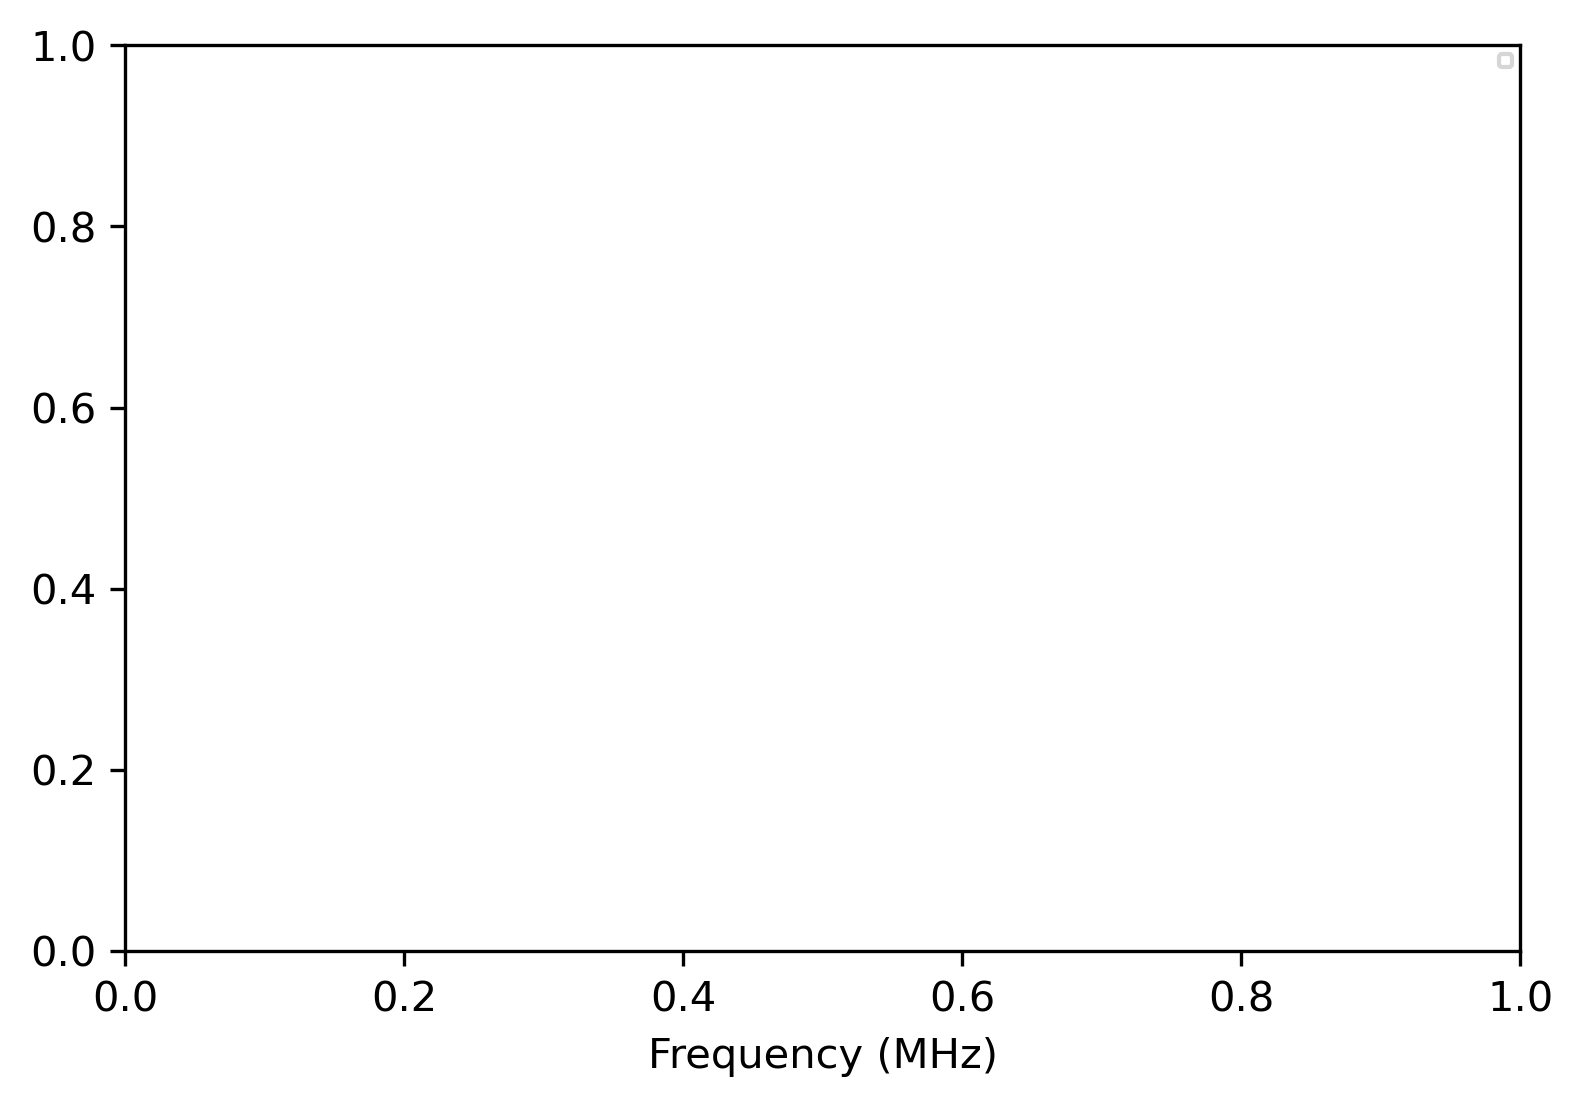

In [27]:
freq=np.arange(512)/512*100
plt.figure(dpi=300)
for i,[p1,p2] in enumerate(pairs):
    if PPwr[i]<Pcut: continue;
    plt.plot(freq[1:],P2dB(np.roll(D2[:,p2,p1],-7)+1e-6)[1:],label='%i-%i'%(p1,p2),linewidth=0.05)
#    plt.plot(freq[1:],np.angle(np.roll(D2[:,p2,p1],-6))[1:],label='%i-%i'%(p1,p2),linewidth=0.05)
plt.legend(fontsize=4,ncol=5)
#plt.ylim(0,60)
plt.xlabel("Frequency (MHz)")

In [28]:
cntmean=(np.mean(np.sum(Cnt,axis=0)))
print(P2dB(cntmean**2))

70.72880137138922


Text(0.5, 1.0, 'RCU2L-QM in DTS outside: Correlation between \npairs of channels. LBA off')

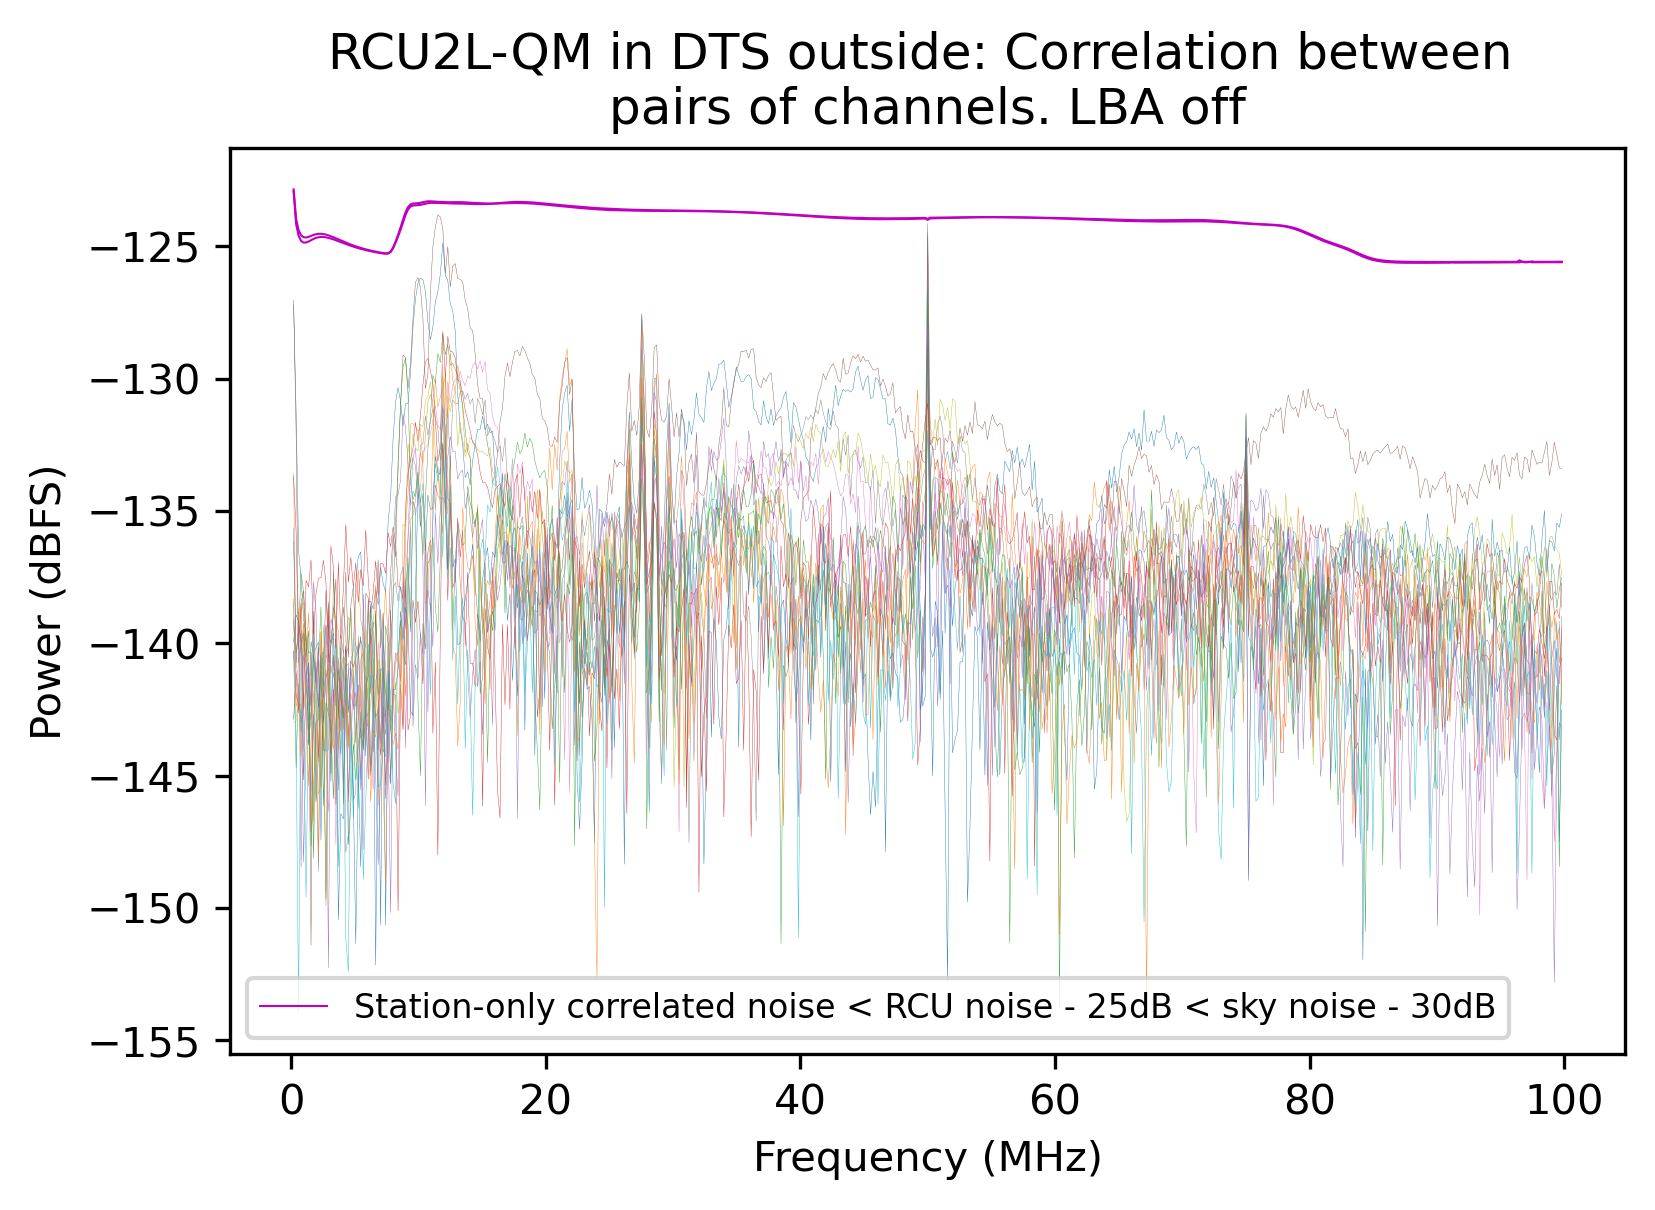

In [29]:
freq=np.arange(512)/512*100
plt.figure(dpi=300)
P1=np.zeros_like(freq[1:],dtype='float')
P2=np.zeros_like(freq[1:],dtype='complex')
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS

cnt=0;
for i,[p1,p2] in enumerate(pairs):
    if PPwr[i]>Pcut: continue;
    P1+=np.abs(np.roll(D2[:,p2,p1],-7)[1:])
    P2+=(np.roll(D2[:,p2,p1],-7)[1:])
    cnt+=1
    plt.plot(freq[1:],P2dB(np.roll(D2[:,p2,p1],-7)+1e-6)[1:]-GainADC,linewidth=0.1)
for i in sis[4:]:
    plt.plot(freq[1:],P2dB(np.roll(D2[:,i,i],-7))[1:]-30+5-GainADC,'m-',linewidth=0.5,label=('Station-only correlated noise < RCU noise - 25dB < sky noise - 30dB' if i==4 else ''))
#plt.plot(freq[1:],P2dB(P2/np.sqrt(cnt))-GainADC,'r-',linewidth=0.5,label='avg pwr')
#plt.plot(freq[1:],P2dB(P1/(cnt))-GainADC,'k-',linewidth=0.5,label='avg correlation')
plt.legend(fontsize=8,ncol=1)
#plt.ylim(0,30)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power (dBFS)")
plt.title("RCU2L-QM in DTS outside: Correlation between \npairs of channels. LBA off")

Text(0.5, 0, 'Frequency (MHz)')

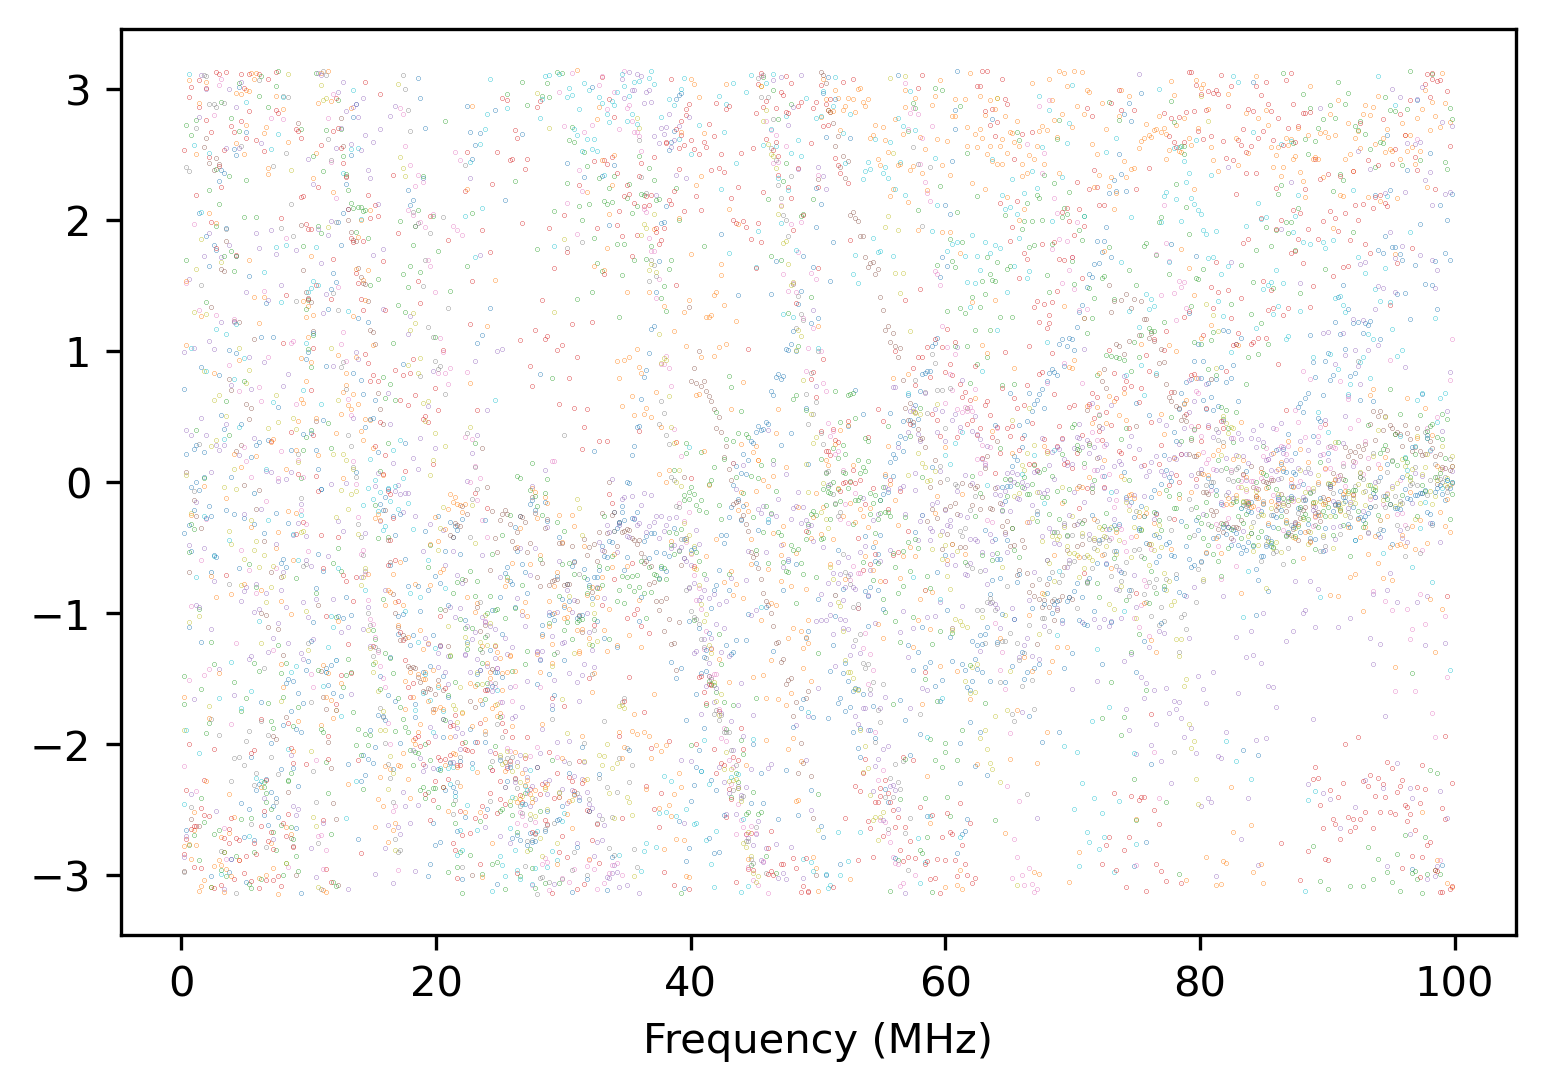

In [30]:
freq=np.arange(512)/512*100
plt.figure(dpi=300)
for i,[p1,p2] in enumerate(pairs):
    if PPwr[i]>Pcut: continue;
    plt.plot(freq[1:],np.angle(np.roll(D2[:,p2,p1],-7)+1e-6)[1:],'.',markersize=0.2,label='%i-%i'%(p1,p2),linewidth=0.05)
#plt.legend(fontsize=4,ncol=5)
#plt.ylim(0,60)
plt.xlabel("Frequency (MHz)")